In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense


In [9]:
heart_data = pd.read_csv('heart.csv')  # replace with your file path

le = LabelEncoder()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    heart_data[col] = le.fit_transform(heart_data[col])

X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


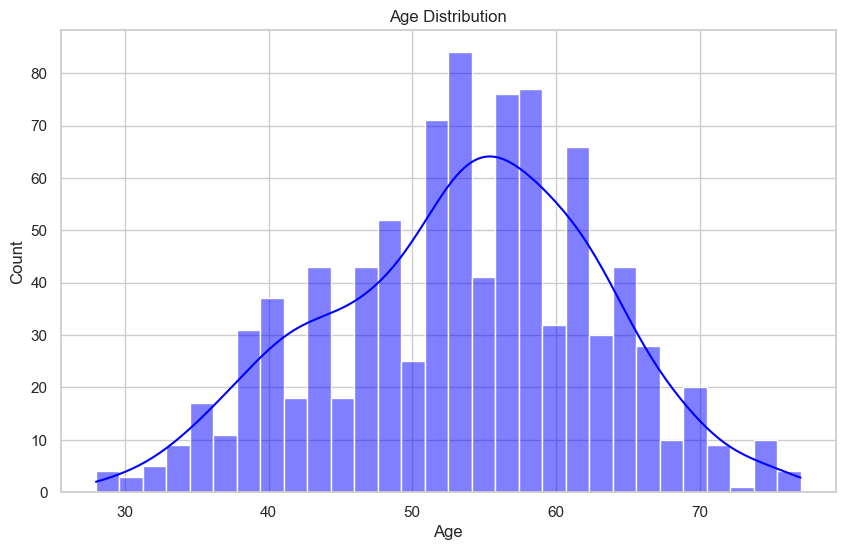

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.show()

# Add more plots as needed


In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
74/74 [==============================] - 0s 686us/step - loss: 26.3800 - accuracy: 0.5981
Epoch 2/100
74/74 [==============================] - 0s 598us/step - loss: 6.1112 - accuracy: 0.5341
Epoch 3/100
74/74 [==============================] - 0s 583us/step - loss: 4.1012 - accuracy: 0.5232
Epoch 4/100
74/74 [==============================] - 0s 586us/step - loss: 2.8270 - accuracy: 0.5150
Epoch 5/100
74/74 [==============================] - 0s 496us/step - loss: 1.8303 - accuracy: 0.5368
Epoch 6/100
74/74 [==============================] - 0s 562us/step - loss: 1.1073 - accuracy: 0.6281
Epoch 7/100
74/74 [==============================] - 0s 608us/step - loss: 0.7220 - accuracy: 0.7466
Epoch 8/100
74/74 [==============================] - 0s 668us/step - loss: 0.6668 - accuracy: 0.7684
Epoch 9/100
74/74 [==============================] - 0s 668us/step - loss: 0.6280 - accuracy: 0.7670
Epoch 10/100
74/74 [==============================] - 0s 607us/step - loss: 0.6155 - accur

74/74 [==============================] - 0s 555us/step - loss: 0.3851 - accuracy: 0.8406
Epoch 82/100
74/74 [==============================] - 0s 584us/step - loss: 0.3626 - accuracy: 0.8515
Epoch 83/100
74/74 [==============================] - 0s 646us/step - loss: 0.4009 - accuracy: 0.8215
Epoch 84/100
74/74 [==============================] - 0s 487us/step - loss: 0.3702 - accuracy: 0.8392
Epoch 85/100
74/74 [==============================] - 0s 493us/step - loss: 0.3760 - accuracy: 0.8379
Epoch 86/100
74/74 [==============================] - 0s 636us/step - loss: 0.3730 - accuracy: 0.8474
Epoch 87/100
74/74 [==============================] - 0s 555us/step - loss: 0.3565 - accuracy: 0.8542
Epoch 88/100
74/74 [==============================] - 0s 609us/step - loss: 0.3776 - accuracy: 0.8460
Epoch 89/100
74/74 [==============================] - 0s 493us/step - loss: 0.3709 - accuracy: 0.8420
Epoch 90/100
74/74 [==============================] - 0s 540us/step - loss: 0.3559 - accuracy: 

Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87     

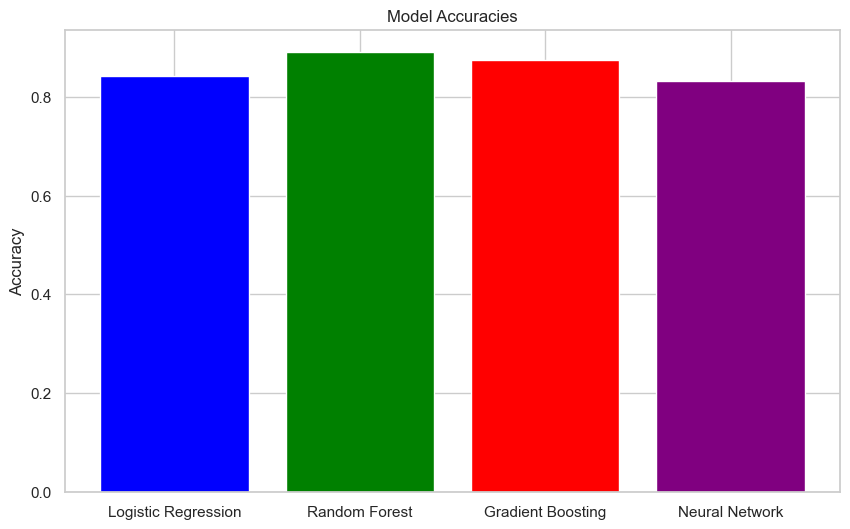

In [13]:
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

y_pred_rf_clf = rf_clf.predict(X_test)
print("Random Forest Classifier:\n", classification_report(y_test, y_pred_rf_clf))

y_pred_gb_clf = gb_clf.predict(X_test)
print("Gradient Boosting Classifier:\n", classification_report(y_test, y_pred_gb_clf))

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("Neural Network:\n", classification_report(y_test, y_pred_nn))

# Calculate accuracies
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
accuracy_gb_clf = accuracy_score(y_test, y_pred_gb_clf)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Create a bar plot for accuracies
accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'Random Forest': accuracy_rf_clf,
    'Gradient Boosting': accuracy_gb_clf,
    'Neural Network': accuracy_nn
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.show()


In [6]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


/Users/sau24k/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sau24k/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sau24k/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/sau24k/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Us

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
